# Type of Apartment VS Type of Neighbourhood vs Ratings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sb.set() # set the default Seaborn style for graphics

from textblob import TextBlob

from sklearn.utils import resample


from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree



from collections import Counter
air_data = pd.read_csv("listings_june.csv")
air_data.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34


In [2]:
air_data["property_type"]=air_data['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')
air_data["property_type"] =air_data["property_type"].to_frame()
air_data["property_type"].head()


C:\Users\junwe\AppData\Local\Temp/ipykernel_22924/3366525147.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["property_type"]=air_data['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')


0    Private room in apartment
1    Private room in apartment
2    Private room in apartment
3        Private room in villa
4        Private room in house
Name: property_type, dtype: object

In [3]:
air_data["neighbourhood_cleansed"]=air_data['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')
air_data["neighbourhood_cleansed"] =air_data["neighbourhood_cleansed"].to_frame()
air_data["neighbourhood_cleansed"].head()


C:\Users\junwe\AppData\Local\Temp/ipykernel_22924/2373546424.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["neighbourhood_cleansed"]=air_data['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')


0      Woodlands
1    Bukit Timah
2      Woodlands
3       Tampines
4       Tampines
Name: neighbourhood_cleansed, dtype: object

In [4]:
print(np.unique(air_data[['neighbourhood_cleansed']].values))


['Ang Mo Kio' 'Bedok' 'Bishan' 'Bukit Batok' 'Bukit Merah' 'Bukit Panjang'
 'Bukit Timah' 'Central Water Catchment' 'Choa Chu Kang' 'Clementi'
 'Downtown Core' 'Geylang' 'Hougang' 'Jurong East' 'Jurong West' 'Kallang'
 'Mandai' 'Marine Parade' 'Museum' 'Newton' 'Novena' 'Orchard' 'Outram'
 'Pasir Ris' 'Pioneer' 'Punggol' 'Queenstown' 'River Valley' 'Rochor'
 'Sembawang' 'Sengkang' 'Serangoon' 'Singapore River' 'Southern Islands'
 'Sungei Kadut' 'Tampines' 'Tanglin' 'Toa Payoh' 'Tuas'
 'Western Water Catchment' 'Woodlands' 'Yishun']


In [5]:
print(np.unique(air_data[['property_type']].values))

['Boat' 'Campsite' 'Chambre privée dans\xa0: appartement'
 'Entire apartment' 'Entire bungalow' 'Entire chalet' 'Entire condominium'
 'Entire guest suite' 'Entire guesthouse' 'Entire home/apt' 'Entire house'
 'Entire loft' 'Entire place' 'Entire serviced apartment'
 'Entire townhouse' 'Entire villa' 'Private room'
 'Private room in apartment' 'Private room in bed and breakfast'
 'Private room in boat' 'Private room in bungalow'
 'Private room in casa particular' 'Private room in chalet'
 'Private room in condominium' 'Private room in earth house'
 'Private room in guest suite' 'Private room in guesthouse'
 'Private room in hostel' 'Private room in house'
 'Private room in lighthouse' 'Private room in loft'
 'Private room in serviced apartment' 'Private room in tent'
 'Private room in townhouse' 'Private room in villa' 'Room in aparthotel'
 'Room in apartment' 'Room in bed and breakfast' 'Room in boutique hotel'
 'Room in heritage hotel' 'Room in hostel' 'Room in hotel'
 'Room in servic

In [6]:
air_data["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
air_data["num_of_amenities"].head()

0     7
1    12
2     8
3    25
4    21
Name: num_of_amenities, dtype: int64

In [7]:
air_data["num_of_veri"]= air_data["host_verifications"].apply(lambda n: len(n.split(',')))
air_data["num_of_veri"].head()

0    9
1    8
2    9
3    5
4    5
Name: num_of_veri, dtype: int64

In [8]:
air_num = air_data[['num_of_amenities','num_of_veri']]
air_num.head()

,num_of_amenities,num_of_veri
0,7,9
1,12,8
2,8,9
3,25,5
4,21,5


In [9]:
#air_data['ratings'] = np.where(air_data['review_scores_rating'] >= 4.7, 'Good', 'Bad')
air_data['ratings'] = air_data['review_scores_rating'] 
air_data['ratings'].head()
air_rate = air_data[['ratings']]
air_rate.head()

,ratings
0,5.00
1,4.56
2,4.88
3,4.44
4,4.16


In [10]:
air_cat = air_data[['property_type','neighbourhood_cleansed']]
air_cat.head()

,property_type,neighbourhood_cleansed
0,Private room in apartment,Woodlands
1,Private room in apartment,Bukit Timah
2,Private room in apartment,Woodlands
3,Private room in villa,Tampines
4,Private room in house,Tampines


In [11]:
ohe = OneHotEncoder()
ohe.fit(air_cat)
air_cat_ohe = pd.DataFrame(ohe.transform(air_cat).toarray(),columns=ohe.get_feature_names(air_cat.columns))
air_cat_ohe.head()

,property_type_Boat,property_type_Campsite,property_type_Chambre privée dans : appartement,property_type_Entire apartment,property_type_Entire bungalow,property_type_Entire chalet,property_type_Entire condominium,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home/apt,...,neighbourhood_cleansed_Singapore River,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
air_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 99 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   property_type_Boat                                4238 non-null   float64
 1   property_type_Campsite                            4238 non-null   float64
 2   property_type_Chambre privée dans : appartement   4238 non-null   float64
 3   property_type_Entire apartment                    4238 non-null   float64
 4   property_type_Entire bungalow                     4238 non-null   float64
 5   property_type_Entire chalet                       4238 non-null   float64
 6   property_type_Entire condominium                  4238 non-null   float64
 7   property_type_Entire guest suite                  4238 non-null   float64
 8   property_type_Entire guesthouse                   4238 non-null   float64
 9   property_type_Entir

In [13]:
air_ohe=pd.concat([air_num,air_cat_ohe,air_rate],sort=False,axis=1).reindex(index=air_num.index)
air_ohe.head(n=20)

,num_of_amenities,num_of_veri,property_type_Boat,property_type_Campsite,property_type_Chambre privée dans : appartement,property_type_Entire apartment,property_type_Entire bungalow,property_type_Entire chalet,property_type_Entire condominium,property_type_Entire guest suite,...,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,ratings
0,7,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.00
1,12,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.56
2,8,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.88
3,25,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.44
4,21,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.16
5,17,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.42
6,14,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.39
7,15,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.55
8,24,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.43
9,17,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.51


In [14]:
air_ohe.info()
air_ohe_test = air_ohe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Columns: 102 entries, num_of_amenities to ratings
dtypes: float64(100), int64(2)
memory usage: 3.3 MB


In [15]:
#air_ohe.interpolate(method ='nearest', limit_direction ='forward', limit = 1)
air_ohe.dropna(subset = ["ratings"],inplace=True)

air_ohe['ratings']=air_ohe['ratings'].round(1)
y = pd.DataFrame(air_ohe['ratings'])
#y.fillna(1, inplace=True)
y.head()

,ratings
0,5.0
1,4.6
2,4.9
3,4.4
4,4.2


In [16]:
X = pd.DataFrame(air_ohe.drop('ratings',axis=1))

In [17]:
from sklearn.ensemble import RandomForestRegressor


C:\Users\junwe\AppData\Local\Temp/ipykernel_22924/1924158282.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


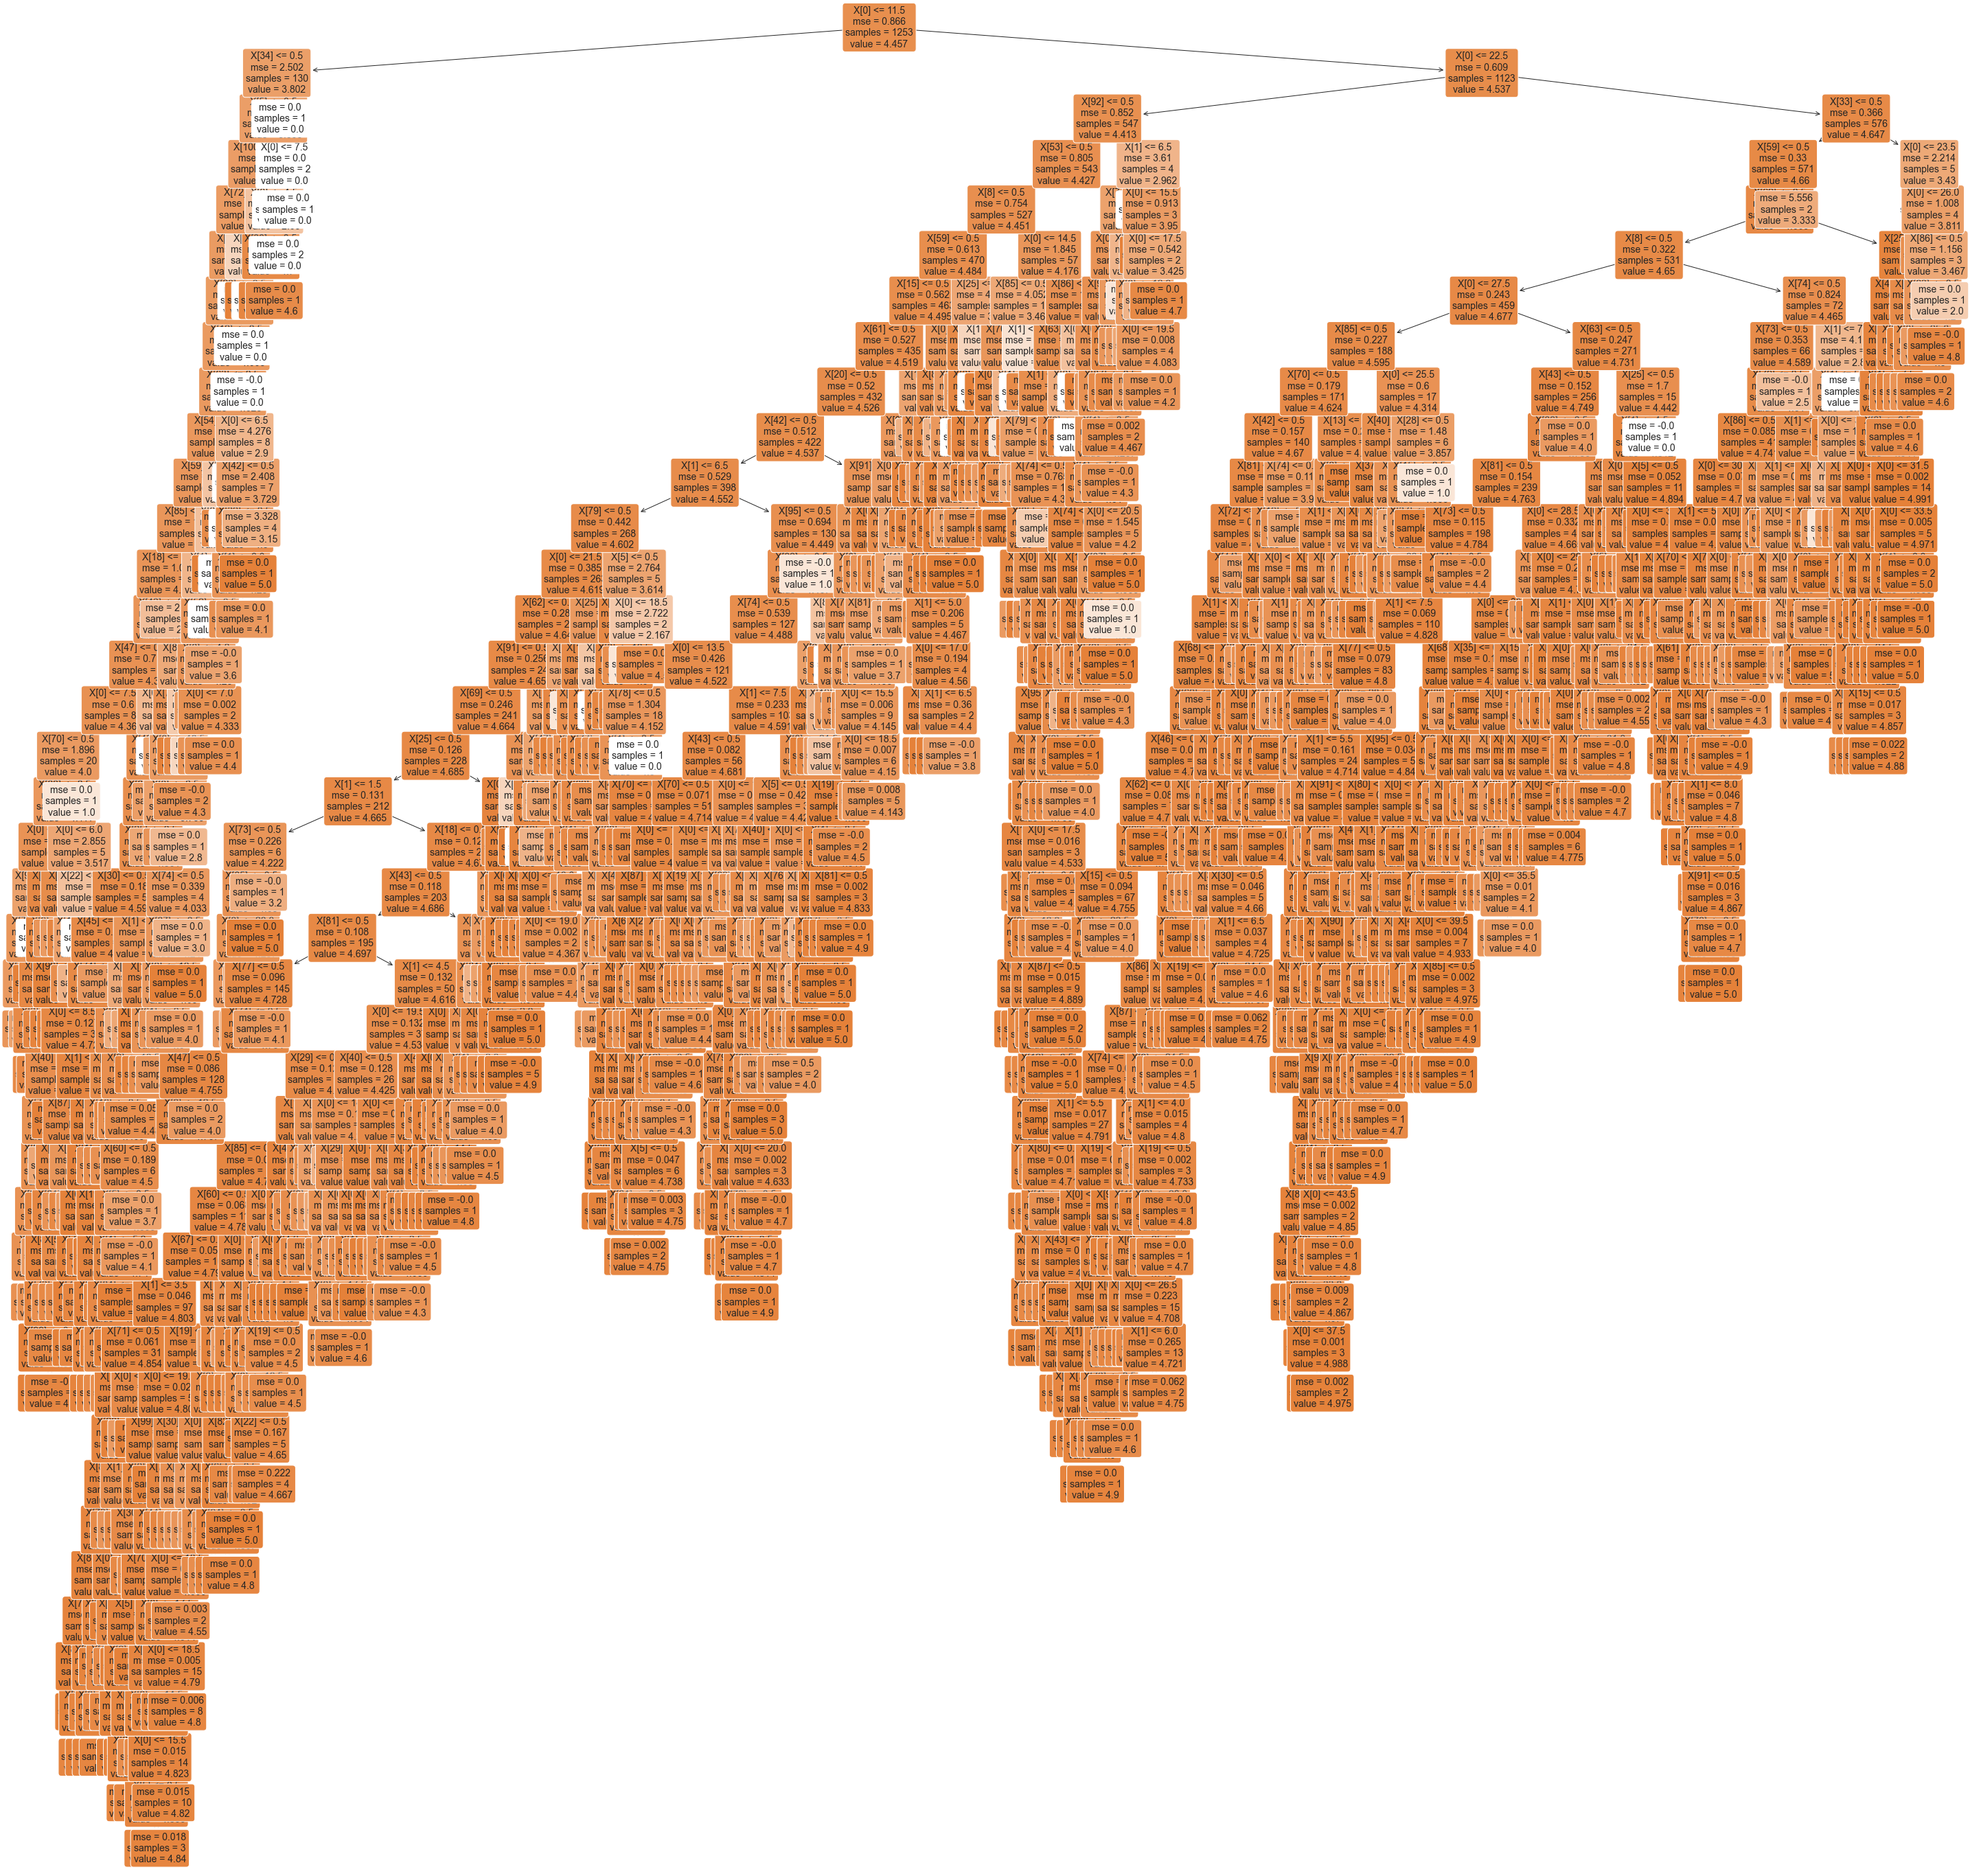

In [25]:
#import pydot
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2)

# Pull out one tree from the forest
regressor = RandomForestRegressor(n_estimators = 2500, random_state = 42,warm_start = True)
regressor.fit(X_train, y_train)
Tree = regressor.estimators_[16]


# Decision Tree using Train Data
#dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
#dectree.fit(X_train, y_train)  
# train the decision tree model


y_pred = regressor.predict(X_test)

# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [26]:
df=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred})
df

,Actual,Predicted
0,5.0,4.696146
1,4.9,4.671392
2,5.0,4.682079
3,4.8,4.899483
4,5.0,4.373399
...,...,...
491,5.0,4.854821
492,4.3,4.341820
493,3.7,4.266732
494,4.1,4.526722


C:\Users\junwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\junwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


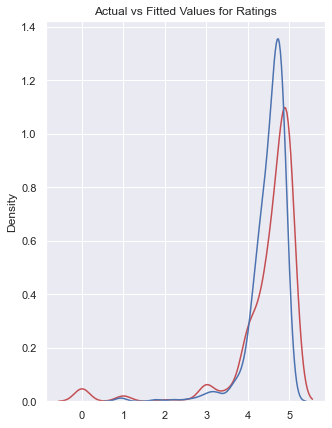

In [27]:
plt.figure(figsize=(5, 7))


ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
sb.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ratings')


plt.show()
plt.close()

In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4791776346813117
Mean Squared Error: 0.7099908703642742
Root Mean Squared Error: 0.8426095598581078


In [29]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error (MAE): 0.4791776346813117
Mean Squared Error (MSE): 0.7099908703642742
Root Mean Squared Error (RMSE): 0.8426095598581078


In [30]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [31]:
mean_absolute_percentage_error(y_test, y_pred)

14.073337563974505